<a href="https://colab.research.google.com/github/louis-perdrix/Modal/blob/main/MTD_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2 # comparez vos resultats à une implementation opencv

from skimage import data

matplotlib.rcParams['font.size'] = 18

names = ['astronaut',
         'binary_blobs',
         'camera',
         'checkerboard',
         'chelsea',
         'clock',
         'coffee',
         'coins',
         'horse',
         'logo',
         'page',
         'text',
         'rocket']

images = {}
for name in names:
    caller = getattr(data, name)
    image = caller()
    images[name] = image.copy()

In [3]:
for name in images:
    img = images[name]
    print('name: ', name, ' rank: ', img.ndim, ' shape: ', img.shape, ' dtype: ', img.dtype)

name:  astronaut  rank:  3  shape:  (512, 512, 3)  dtype:  uint8
name:  binary_blobs  rank:  2  shape:  (512, 512)  dtype:  bool
name:  camera  rank:  2  shape:  (512, 512)  dtype:  uint8
name:  checkerboard  rank:  2  shape:  (200, 200)  dtype:  uint8
name:  chelsea  rank:  3  shape:  (300, 451, 3)  dtype:  uint8
name:  clock  rank:  2  shape:  (300, 400)  dtype:  uint8
name:  coffee  rank:  3  shape:  (400, 600, 3)  dtype:  uint8
name:  coins  rank:  2  shape:  (303, 384)  dtype:  uint8
name:  horse  rank:  2  shape:  (328, 400)  dtype:  bool
name:  logo  rank:  3  shape:  (500, 500, 4)  dtype:  uint8
name:  page  rank:  2  shape:  (191, 384)  dtype:  uint8
name:  text  rank:  2  shape:  (172, 448)  dtype:  uint8
name:  rocket  rank:  3  shape:  (427, 640, 3)  dtype:  uint8


In [4]:
def uint8_RGB_to_float32(img):
    return img.astype(np.float32)/255.

def uint8_GRAY_to_float32(img):
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img, axis=-1)
    # img = np.tile(img, (1, 1, 3))
    return img

def bool_to_float32(img):
    img = img.astype(np.float32)
    img = np.expand_dims(img, axis=-1)
    # img = np.tile(img, (1, 1, 3))
    return img

def float32_to_uint8(img):
    img = 255.*img
    return img.astype(np.uint8)

def to_float32(img):
    if img.dtype == 'uint8':
        if img.ndim == 2:
            return uint8_GRAY_to_float32(img)
        else:
            return uint8_RGB_to_float32(img)
    if img.dtype == 'bool':
        return bool_to_float32(img)

for name in images:
    img = images[name]
    img = to_float32(img)
    images[name] = img

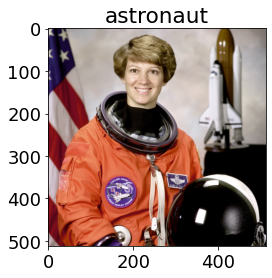

In [5]:
def imshow(img, title=''):
    plt.title(title)
    if img.ndim == 2:
        plt.imshow(img, cmap=plt.cm.gray)
    else:
        if img.shape[2] == 1:
          img = np.repeat(img, repeats=3, axis=2)
        plt.imshow(img)
    
    plt.show()

imshow(images['astronaut'], 'astronaut')

In [ ]:
img.shape

(427, 640, 3)

In [6]:
def reduce_resolution(img, k):
  for i in range(k):
    img = reduce_once(img)
  return img

def reduce_once(img):
  r = img.ndim
  h, w = img.shape[0], img.shape[1]
  if r==2:
    new = np.zeros((h//2, w//2))
    i, j = 0, 0
    while i < h//2 - 1:
      while j < w//2 -1:
        mean = (img[2*i, 2*j] + img[2*i+1, 2*j] + img[2*i, 2*j+1] + img[2*i+1, 2*j+1])/4
        new[i, j] = mean
        j += 1
      i +=1
  elif r==3:
    new = np.zeros((h//2, w//2, 3))
    i = 0
    while i < h//2 -1:
      j = 0
      while j < w//2-1:
        #rgb = np.zeros(3)
        #for k in range(3):
          #mean = (img[2*i, 2*j, k] + img[2*i+1, 2*j, k] + img[2*i, 2*j+1, k] + img[2*i+1, 2*j+1, k])/4
          #new[i, j, k] = mean
        mean = 0.25*(img[2*i, 2*j] + img[2*i+1, 2*j] + img[2*i, 2*j+1] + img[2*i+1, 2*j+1])
        #print(new[i, j])
        new[i, j] = mean
        j +=1
      i +=1
  return new


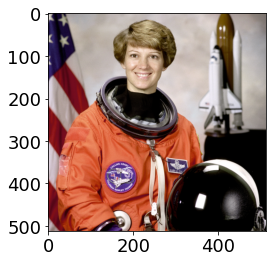

In [ ]:
imshow(images['astronaut'], '')

In [ ]:
images['astronaut'].shape

(512, 512, 3)

In [ ]:
images['astronaut'].dtype

dtype('float32')

In [ ]:
images['astronaut'][0, 0]

array([0.6039216, 0.5764706, 0.5921569], dtype=float32)

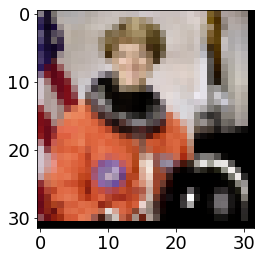

In [ ]:
imshow(reduce_resolution(images['astronaut'], 4), '')

In [7]:
def get_value_naive(img, x, y):
  h, w = img.shape[0], img.shape[1]
  if x>=w or y>=h or x<0 or y<0:
    return 0
  else:
    return img[int(x), int(y)]

def rescale_naive(img, w_new, h_new):
  rapport_h = img.shape[0]/h_new
  rapport_w = img.shape[1]/w_new
  res = np.zeros((h_new, w_new, 3))
  for i in range(h_new):
    for j in range(w_new):
      res[i, j] = get_value_naive(img, i*rapport_h, j*rapport_w)
  return res 

In [ ]:
images['astronaut'].shape

(512, 512, 3)

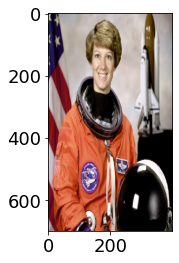

In [ ]:
imshow(rescale_naive(images['astronaut'], 400, 700), '')

In [8]:
def rotate90(img):
  res = np.zeros(img.shape)
  h, w = img.shape[0], img.shape[1]
  for i in range(h):
    for j in range(w):
      res[i, j] = img[(j-w)%w, (i-h)%h]
  return res

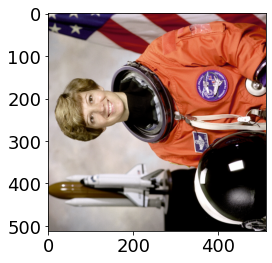

In [ ]:
imshow(rotate90(images['astronaut']), '')

In [9]:
def rotate_naive(img, theta):
  res = np.zeros(img.shape)
  h, w = img.shape[0], img.shape[1]
  for i in range(h):
    for j in range(w):
      res[i, j] = get_value_naive(img, ((i-h//2)*np.cos(theta) +(j-w//2)*np.sin(theta)) + h//2, ((j-w//2)*np.cos(theta) - (i-h//2)*np.sin(theta)) + w//2)
  return res
  

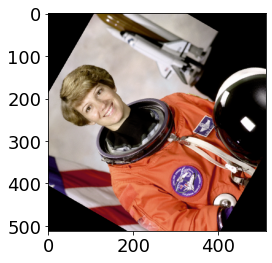

In [ ]:
imshow(rotate_naive(images['astronaut'], np.pi/3), '')

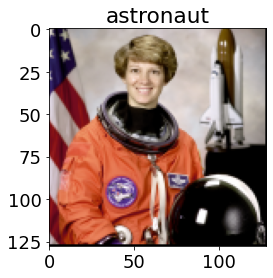

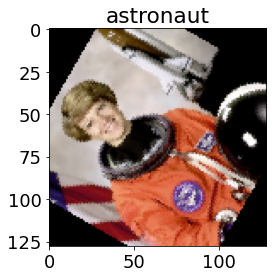

In [ ]:
image = images['astronaut']
image = reduce_resolution(image, 2)
imshow(image, 'astronaut')
image = rotate_naive(image, np.pi / 3.)
imshow(image, 'astronaut')

In [10]:
def bilinear_interp(img, x, y):
  h, w = img.shape[0], img.shape[1]
  if x>=w-1 or y>=h-1 or x<0 or y<0:
    return 0
  else:
    x1 = int(np.floor(x))
    x2 = int(np.ceil(x))
    y1 = int(np.floor(y))
    y2 = int(np.ceil(y))
    return (img[x2, y1]-img[x1, y1])*(x-x1) + (img[x1, y2]-img[x1, y1])*(y-y1) + (img[x1, y1]+img[x2, y2]-img[x2, y1]-img[x1, y2])*(x-x1)*(y-y1) + img[x1, y1]

In [11]:
def rescale(img, w_new, h_new):
  rapport_h = img.shape[0]/h_new
  rapport_w = img.shape[1]/w_new
  res = np.zeros((h_new, w_new, 3))
  for i in range(h_new):
    for j in range(w_new):
      res[i, j] = bilinear_interp(img, i*rapport_h, j*rapport_w)
  return res 

def rotate(img, theta):
  res = np.zeros(img.shape)
  h, w = img.shape[0], img.shape[1]
  for i in range(h):
    for j in range(w):
      res[i, j] = bilinear_interp(img, ((i-h//2)*np.cos(theta) +(j-w//2)*np.sin(theta)) + h//2, ((j-w//2)*np.cos(theta) - (i-h//2)*np.sin(theta)) + w//2)
  return res

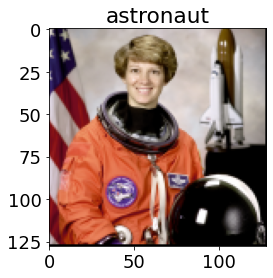

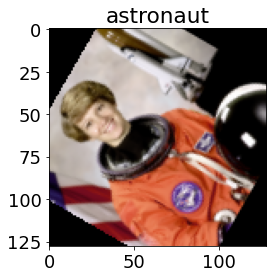

In [ ]:
image = images['astronaut']
image = reduce_resolution(image, 2)
imshow(image, 'astronaut')
image = rotate(image, np.pi / 3.)
imshow(image, 'astronaut')

In [ ]:
np.floor(3.3)

3.0

In [ ]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [ ]:
np.pad(a, 1)

array([0, 1, 2, 3, 0])

In [12]:
def convolution(img, w):
  res = np.zeros(img.shape)
  h, g = img.shape[0], img.shape[1]
  hw, gw = w.shape[0], w.shape[1]
  img_pad = np.pad(img, ((hw//2, hw//2),(gw//2,gw//2),), 'edge')
  print(img_pad.shape)
  for i in range(h):
    for j in range(g):
      for k in range(hw):
        for l in range(gw):
          res[i, j] += w[k, l]*img_pad[i+k, j+l]
  return res

In [13]:
def gaussian_blur(img):
  noyau = (1./273.)*np.array([[1., 4. , 7. , 4. , 1.],
           [4., 16., 26., 16., 4.],
           [7., 26., 41., 26., 7.],
           [4., 16., 26., 16., 4.],
           [1., 4. , 7. , 4. , 1.]])
  return convolution(img, noyau)

In [ ]:
b = (1./273.)*np.array([[1., 4. , 7. , 4. , 1.],
           [4., 16., 26., 16., 4.],
           [7., 26., 41., 26., 7.],
           [4., 16., 26., 16., 4.],
           [1., 4. , 7. , 4. , 1.]])
b

array([[0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ],
       [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
       [0.02564103, 0.0952381 , 0.15018315, 0.0952381 , 0.02564103],
       [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
       [0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ]])

In [14]:
def conversion_RGB(img):
  h, w = img.shape[0], img.shape[1]
  res = np.zeros((h, w))
  for i in range(h):
    for j in range(w):
      res[i,j]= 0.21*img[i,j,0] + 0.72*img[i,j,1] + 0.07*img[i,j,2]
  return res

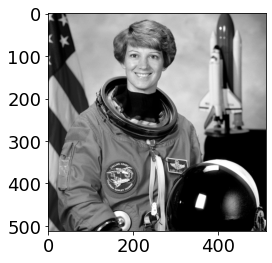

In [ ]:
imshow(conversion_RGB(images['astronaut']),'')

(516, 516)


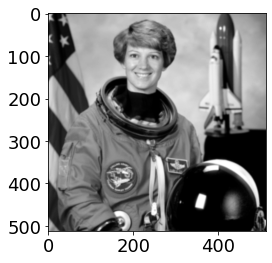

In [ ]:
imshow(gaussian_blur(conversion_RGB(images['astronaut'])), '')

(512, 518)
(518, 512)


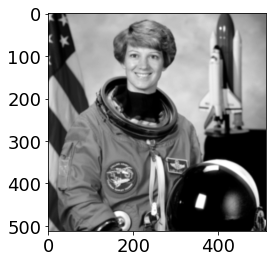

In [20]:
a = np.array([[0.006, 0.061, 0.242, 0.383, 0.242, 0.061, 0.006]])
c=convolution(conversion_RGB(images['astronaut']),a)
imshow(convolution(c, np.transpose(a)), '')

(514, 514)


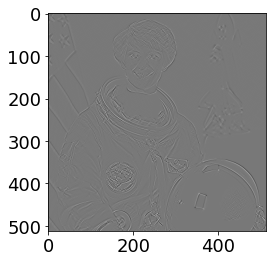

In [23]:
a = 1/3*np.array(([1, 0, -1], [0, 0, 0], [-1, 0, 1]))
imshow(convolution(conversion_RGB(images['astronaut']), a), '')